# Stellar Colors in JWST Filters

This notebook demonstrates how to use the stellar colors table to analyze stellar photometry in JWST filters.

## Overview

The stellar colors table contains computed magnitudes for stellar atmosphere models with varying effective temperatures, spanning from cool M dwarfs (2000K) to hot O stars (50000K). This allows us to:

- Study how stellar colors vary with temperature
- Create color-color diagrams for different spectral types
- Analyze the sensitivity of different JWST filters to stellar properties
- Use as a reference for stellar photometry studies

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import os
import sys

# Add the icemodels package to the path
sys.path.insert(0, os.path.join(os.getcwd(), '..'))

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Imports completed successfully!")

Imports completed successfully!


## Load the Stellar Colors Table

In [42]:
def load_stellar_colors():
    """Load the stellar colors table."""
    # Path to the data file
    table_path = '../icemodels/data/stellar_colors_in_filters.ecsv'

    if not os.path.exists(table_path):
        raise FileNotFoundError(f"Stellar colors table not found at {table_path}")

    return Table.read(table_path)

# Load the table
try:
    tbl = load_stellar_colors()
    print(f"✓ Successfully loaded stellar colors table")
    print(f"  - {len(tbl)} stellar models")
    print(f"  - Temperature range: {tbl['temperature'].min():.0f}K - {tbl['temperature'].max():.0f}K")
    print(f"  - Available filters: {len([col for col in tbl.colnames if col not in ['temperature', 'model_type', 'spectral_type']])}")
except Exception as e:
    print(f"✗ Error loading table: {e}")
    print("Make sure to run 'python -m icemodels.stellar_colors_in_filters' first to generate the table.")

✓ Successfully loaded stellar colors table
  - 49 stellar models
  - Temperature range: 2000K - 37628K
  - Available filters: 37


## Explore the Data Structure

In [43]:
# Show table info
print("Table columns:")
for col in tbl.colnames:
    print(f"  - {col}")

print(f"\nTable shape: ({len(tbl)}, {len(tbl.colnames)})")
print(f"\nFirst few rows:")
tbl[:5]  # Show first 5 rows

Table columns:
  - temperature
  - model_type
  - spectral_type
  - F115W
  - F150W
  - F162M
  - F182M
  - F187N
  - F200W
  - F210M
  - F212N
  - F250M
  - F277W
  - F300M
  - F323N
  - F322W2
  - F335M
  - F356W
  - F360M
  - F405N
  - F410M
  - F430M
  - F444W
  - F460M
  - F466N
  - F470N
  - F480M
  - F560W
  - F770W
  - F1000W
  - F1065C
  - F1130W
  - F1140C
  - F1280W
  - F1500W
  - F1550C
  - F1800W
  - F2100W
  - F2300C
  - F2550W

Table shape: (49, 40)

First few rows:


temperature,model_type,spectral_type,F115W,F150W,F162M,F182M,F187N,F200W,F210M,F212N,F250M,F277W,F300M,F323N,F322W2,F335M,F356W,F360M,F405N,F410M,F430M,F444W,F460M,F466N,F470N,F480M,F560W,F770W,F1000W,F1065C,F1130W,F1140C,F1280W,F1500W,F1550C,F1800W,F2100W,F2300C,F2550W
float64,str18,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2000.0,stellar_atmosphere,M,-13.596916941049216,-13.76081028759263,-13.899252197387463,-13.380444491154444,-13.306446296900805,-13.425556797077336,-13.53351579000785,-13.567523475264933,-13.677821555917047,-14.094296504355404,-14.46559434967937,-14.444757318480423,-14.67655699809061,-14.679260763485571,-15.096658822747264,-15.238220511325093,-15.53404843885585,-15.49532193396401,-15.450004967046798,-15.417757342999254,-15.3490698285791,-15.393413190123761,-15.375499948219897,-15.374649718084177,-15.408599593076815,-15.515323574173564,-15.992314912526952,-16.03467860750222,-16.09333678094997,-16.096967605183767,-16.12645712009042,-16.171175049482315,-16.185420488892092,-16.23495101593203,-16.275934585576394,-16.301803287461333,-16.346458091812288
2126.089918898783,stellar_atmosphere,M,-13.577679899570427,-13.817996763165253,-13.94752174276002,-13.509960854102106,-13.450552730475485,-13.544462118971508,-13.634453382311749,-13.664558703783936,-13.78229592611441,-14.136328726101004,-14.466125480378867,-14.618392889755935,-14.677871029313582,-14.79532591379067,-15.08601083155568,-15.211946991780973,-15.422506883700027,-15.388248107858296,-15.345120050391156,-15.305234186075245,-15.224111830389164,-15.270827914091354,-15.253732476115685,-15.257957579017384,-15.32385743804304,-15.444550932530888,-15.861197961612916,-15.904486651989755,-15.953820920276534,-15.957336252775782,-15.976795039091854,-16.01407332491579,-16.03019186151362,-16.07295348192619,-16.111054501024896,-16.135415397978633,-16.177569903288358
2260.1291716215164,stellar_atmosphere,M,-13.528976061496836,-13.853853907838559,-13.985345122579407,-13.627560570975746,-13.583023346237377,-13.660414812227204,-13.740557241024796,-13.769169432603599,-13.88354356575797,-14.175502116977466,-14.46100325951403,-14.775638909545957,-14.672982460307374,-14.891522803403006,-15.066214261687215,-15.166146570269587,-15.307547322012411,-15.276584083044098,-15.238371057679792,-15.197360976407213,-15.118726459603389,-15.163915371469038,-15.146250913770775,-15.154521469556823,-15.238707506203738,-15.375000899460279,-15.730125483106878,-15.774622908368773,-15.812659403154214,-15.815898444914666,-15.82471693534803,-15.85626503533292,-15.870796222106145,-15.90937536983169,-15.945480136627223,-15.969531488757465,-16.009649320456695
2402.6189235967836,stellar_atmosphere,M,-13.463181704715383,-13.875040130537935,-14.017641025020303,-13.739220187211355,-13.70843303768557,-13.775635098820285,-13.851617168253242,-13.881612880000112,-13.978253674709082,-14.21030434714769,-14.446059873492077,-14.82215654264383,-14.647247418059642,-14.912659955958826,-15.014864351918662,-15.089790291539922,-15.194240824899472,-15.165477446781978,-15.134428960060033,-15.09799389022507,-15.034869859260741,-15.077076268783465,-15.060586166709662,-15.067907067380268,-15.15234809123629,-15.287908962008785,-15.5939212130612,-15.64034468647742,-15.660299008543902,-15.662791602014872,-15.666051576702749,-15.695435694481985,-15.710440514456423,-15.745888972339635,-15.782665882051583,-15.805911141355296,-15.842746125693674
2554.091936207283,stellar_atmosphere,M,-13.371190479706286,-13.881133863759294,-14.038701860709734,-13.839779495751634,-13.821760065684344,-13.878990103098804,-13.950918452956705,-13.981875681955936,-14.056399172302312,-14.23863660263448,-14.427186845866508,-14.756688894528684,-14.601479596213016,-14.847259646057445,-14.93185875062064,-14

## Summary Statistics by Spectral Type

In [44]:
# Analyze models by spectral type
print("Models by spectral type:")
for spec_type in np.unique(tbl['spectral_type']):
    mask = tbl['spectral_type'] == spec_type
    temp_range = f"{tbl[mask]['temperature'].min():.0f}-{tbl[mask]['temperature'].max():.0f}K"
    count = np.sum(mask)
    print(f"  {spec_type}: {count} models ({temp_range})")

# Show example magnitudes for different spectral types
print(f"\nExample magnitudes for different spectral types:")
for spec_type in ['M', 'G', 'A', 'B', 'O']:
    mask = tbl['spectral_type'] == spec_type
    if np.sum(mask) > 0:
        idx = np.where(mask)[0][0]  # First occurrence
        temp = tbl[idx]['temperature']
        print(f"\n{spec_type} star ({temp:.0f}K):")
        for filt in ['F115W', 'F212N', 'F444W', 'F1000W']:
            if filt in tbl.colnames:
                print(f"  {filt}: {tbl[idx][filt]:.2f} mag")

Models by spectral type:
  A: 5 models (7677-9803K)
  B: 18 models (10421-29465K)
  F: 4 models (6011-7221K)
  G: 2 models (5319-5655K)
  K: 5 models (3918-5004K)
  M: 11 models (2000-3686K)
  O: 4 models (31322-37628K)

Example magnitudes for different spectral types:

M star (2000K):
  F115W: -13.60 mag
  F212N: -13.57 mag
  F444W: -15.42 mag
  F1000W: -15.99 mag

G star (5319K):
  F115W: -12.62 mag
  F212N: -13.22 mag
  F444W: -13.21 mag
  F1000W: -13.27 mag

A star (7677K):
  F115W: -11.91 mag
  F212N: -12.06 mag
  F444W: -12.05 mag
  F1000W: -12.07 mag

B star (10421K):
  F115W: -11.07 mag
  F212N: -11.05 mag
  F444W: -11.02 mag
  F1000W: -11.03 mag

O star (31322K):
  F115W: -7.87 mag
  F212N: -7.63 mag
  F444W: -7.48 mag
  F1000W: -7.41 mag


## Color vs Temperature Analysis

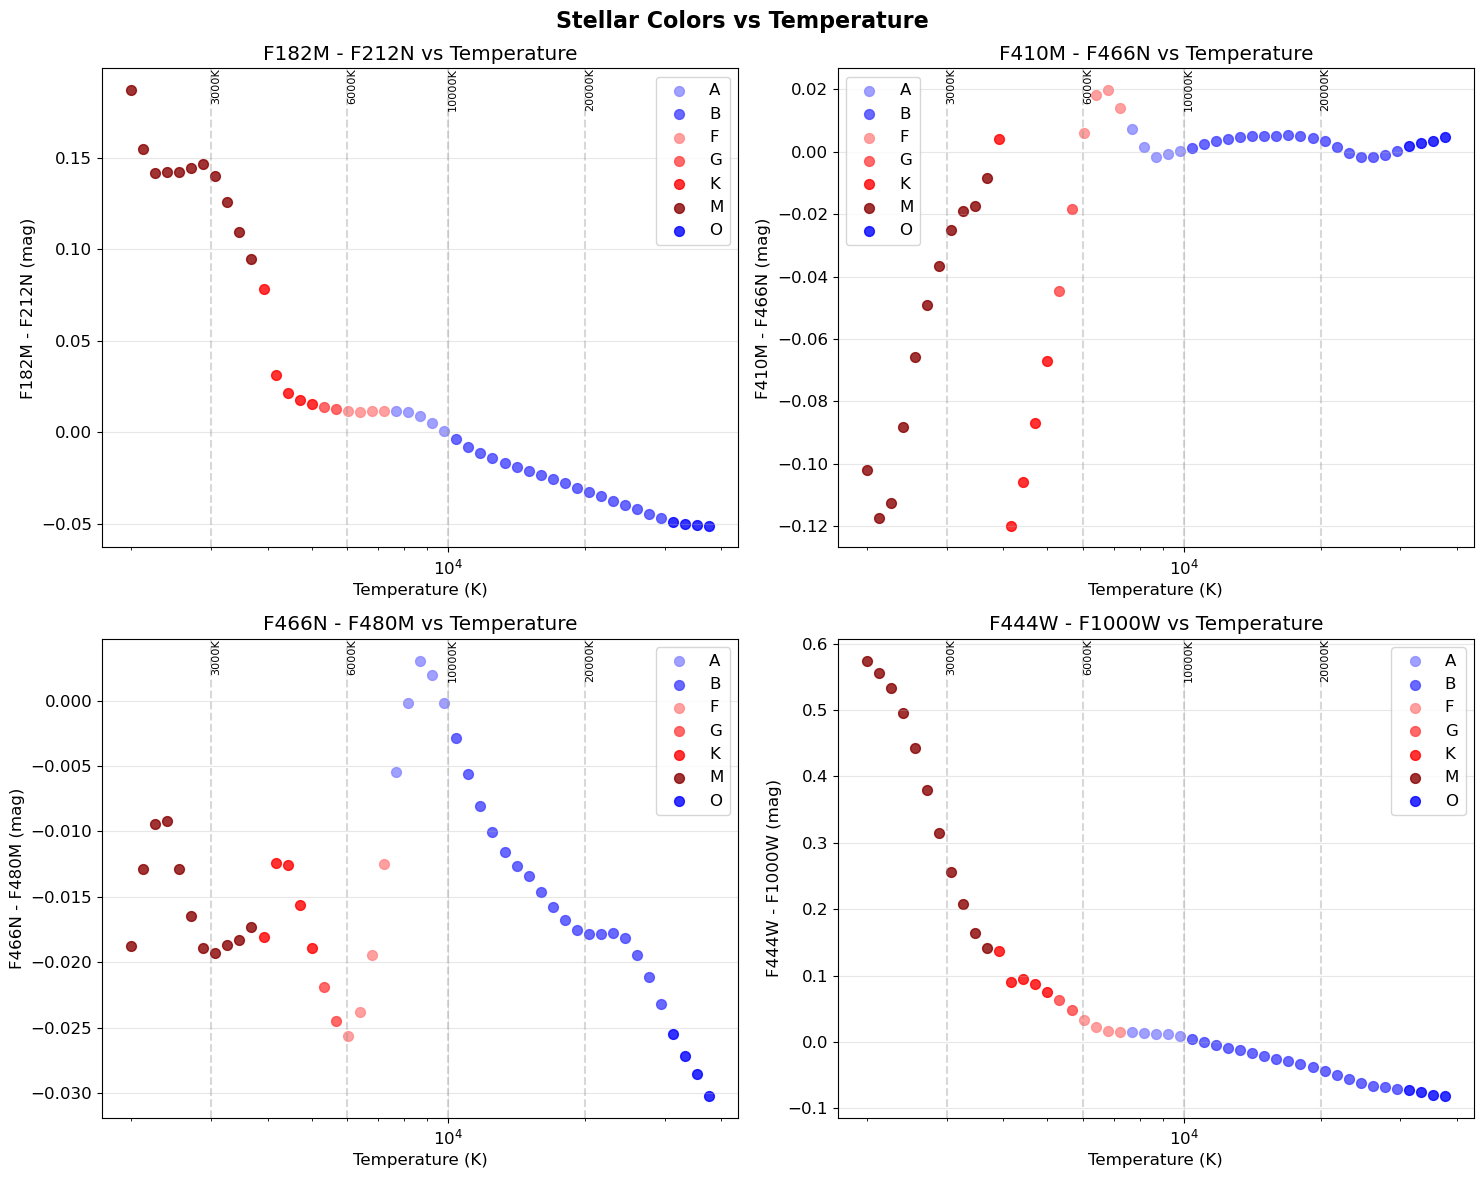

In [45]:
# Create a comprehensive color vs temperature plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Stellar Colors vs Temperature', fontsize=16, fontweight='bold')

# Define interesting color combinations (matching colorcolordiagrams.py)
color_combinations = [
    ('F182M', 'F212N', 'F182M - F212N'),
    ('F410M', 'F466N', 'F410M - F466N'),
    ('F466N', 'F480M', 'F466N - F480M'),
    ('F444W', 'F1000W', 'F444W - F1000W')
]

# Spectral type colors for plotting
spec_colors = {
    'O': '#0000FF',  # Blue
    'B': '#4444FF',  # Light blue
    'A': '#8888FF',  # Very light blue
    'F': '#FF8888',  # Light red
    'G': '#FF4444',  # Red
    'K': '#FF0000',  # Dark red
    'M': '#880000'   # Very dark red
}

for i, (filt1, filt2, color_name) in enumerate(color_combinations):
    ax = axes[i//2, i%2]

    if filt1 in tbl.colnames and filt2 in tbl.colnames:
        color = tbl[filt1] - tbl[filt2]

        # Plot by spectral type with different colors
        for spec_type in np.unique(tbl['spectral_type']):
            mask = tbl['spectral_type'] == spec_type
            if np.sum(mask) > 0:
                ax.scatter(tbl[mask]['temperature'], color[mask],
                          c=spec_colors[spec_type], label=spec_type, s=50, alpha=0.8)

        ax.set_xlabel('Temperature (K)')
        ax.set_ylabel(f'{color_name} (mag)')
        ax.set_title(f'{color_name} vs Temperature')
        ax.grid(True, alpha=0.3)
        ax.legend()

        # Use log scale for temperature
        ax.set_xscale('log')

        # Add some temperature annotations
        for temp in [3000, 6000, 10000, 20000, 40000]:
            if temp >= tbl['temperature'].min() and temp <= tbl['temperature'].max():
                ax.axvline(temp, color='gray', alpha=0.3, linestyle='--')
                ax.text(temp, ax.get_ylim()[1], f'{temp}K',
                       rotation=90, verticalalignment='top', fontsize=8)

plt.tight_layout()
plt.show()

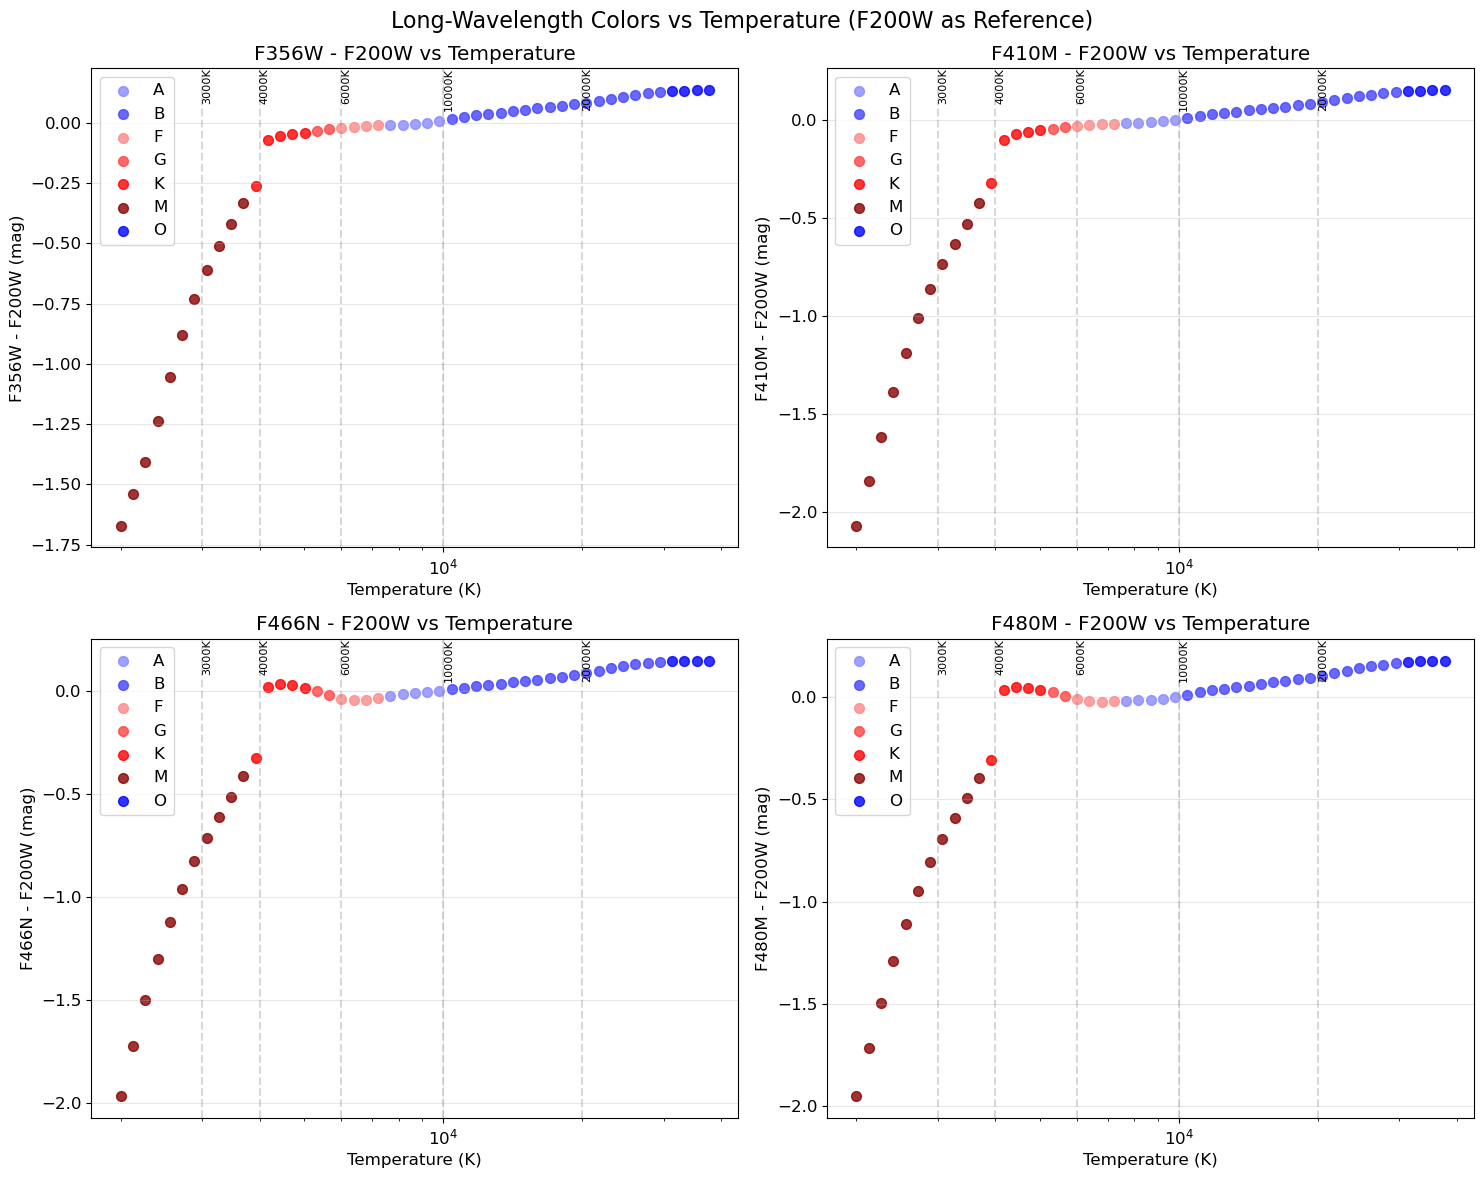

In [51]:
# Create color vs temperature plots for long-wavelength filters relative to F200W
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Long-Wavelength Colors vs Temperature (F200W as Reference)', fontsize=16)

# Define long-wavelength filters to compare with F200W
long_wave_filters = ['F356W', 'F410M', 'F466N', 'F480M']
reference_filter = 'F200W'

# Spectral type colors for plotting
spec_colors = {
    'O': '#0000FF',  # Blue
    'B': '#4444FF',  # Light blue
    'A': '#8888FF',  # Very light blue
    'F': '#FF8888',  # Light red
    'G': '#FF4444',  # Red
    'K': '#FF0000',  # Dark red
    'M': '#880000'   # Very dark red
}

for i, long_filt in enumerate(long_wave_filters):
    ax = axes[i//2, i%2]

    if long_filt in tbl.colnames and reference_filter in tbl.colnames:
        color = tbl[long_filt] - tbl[reference_filter]

        # Plot by spectral type with different colors
        for spec_type in np.unique(tbl['spectral_type']):
            mask = tbl['spectral_type'] == spec_type
            if np.sum(mask) > 0:
                ax.scatter(tbl[mask]['temperature'], color[mask],
                          c=spec_colors[spec_type], label=spec_type, s=50, alpha=0.8)

        ax.set_xlabel('Temperature (K)')
        ax.set_ylabel(f'{long_filt} - {reference_filter} (mag)')
        ax.set_title(f'{long_filt} - {reference_filter} vs Temperature')
        ax.grid(True, alpha=0.3)
        ax.legend()

        # Use log scale for temperature
        ax.set_xscale('log')

        # Add some temperature annotations
        for temp in [3000, 4000, 6000, 10000, 20000, 40000]:
            if temp >= tbl['temperature'].min() and temp <= tbl['temperature'].max():
                ax.axvline(temp, color='gray', alpha=0.3, linestyle='--')
                ax.text(temp, ax.get_ylim()[1], f'{temp}K',
                       rotation=90, verticalalignment='top', fontsize=8)
    else:
        ax.text(0.5, 0.5, f'Required filters not available\n({long_filt}, {reference_filter})',
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{long_filt} - {reference_filter} (filters not available)')

plt.tight_layout()
plt.show()


## Color-Color Diagrams

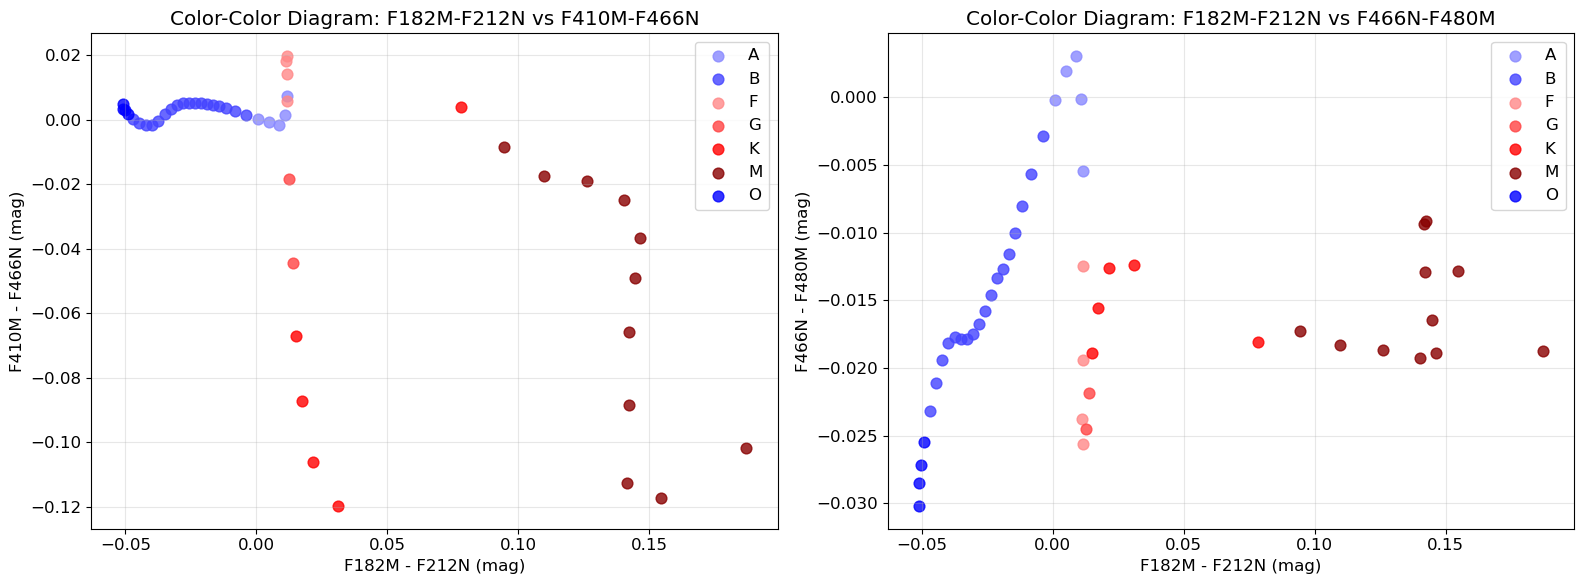

In [49]:
# Create multiple color-color diagrams
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Diagram 1: F182M-F212N vs F410M-F466N (matching colorcolordiagrams.py)
ax1 = axes[0]
if all(filt in tbl.colnames for filt in ['F182M', 'F212N', 'F410M', 'F466N']):
    x_color = tbl['F182M'] - tbl['F212N']
    y_color = tbl['F410M'] - tbl['F466N']

    for spec_type in np.unique(tbl['spectral_type']):
        mask = tbl['spectral_type'] == spec_type
        if np.sum(mask) > 0:
            ax1.scatter(x_color[mask], y_color[mask],
                       c=spec_colors[spec_type], label=spec_type, s=60, alpha=0.8)

    ax1.set_xlabel('F182M - F212N (mag)')
    ax1.set_ylabel('F410M - F466N (mag)')
    ax1.set_title('Color-Color Diagram: F182M-F212N vs F410M-F466N')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
else:
    ax1.text(0.5, 0.5, 'Required filters not available\n(F182M, F212N, F410M, F466N)',
             ha='center', va='center', transform=ax1.transAxes)
    ax1.set_title('F182M-F212N vs F410M-F466N (filters not available)')

# Diagram 2: F182M-F212N vs F466N-F480M (matching colorcolordiagrams.py)
ax2 = axes[1]
if all(filt in tbl.colnames for filt in ['F182M', 'F212N', 'F466N', 'F480M']):
    x_color = tbl['F182M'] - tbl['F212N']
    y_color = tbl['F466N'] - tbl['F480M']

    for spec_type in np.unique(tbl['spectral_type']):
        mask = tbl['spectral_type'] == spec_type
        if np.sum(mask) > 0:
            ax2.scatter(x_color[mask], y_color[mask],
                       c=spec_colors[spec_type], label=spec_type, s=60, alpha=0.8)

    ax2.set_xlabel('F182M - F212N (mag)')
    ax2.set_ylabel('F466N - F480M (mag)')
    ax2.set_title('Color-Color Diagram: F182M-F212N vs F466N-F480M')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
else:
    ax2.text(0.5, 0.5, 'Required filters not available\n(F182M, F212N, F466N, F480M)',
             ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('F182M-F212N vs F466N-F480M (filters not available)')

plt.tight_layout()
plt.show()

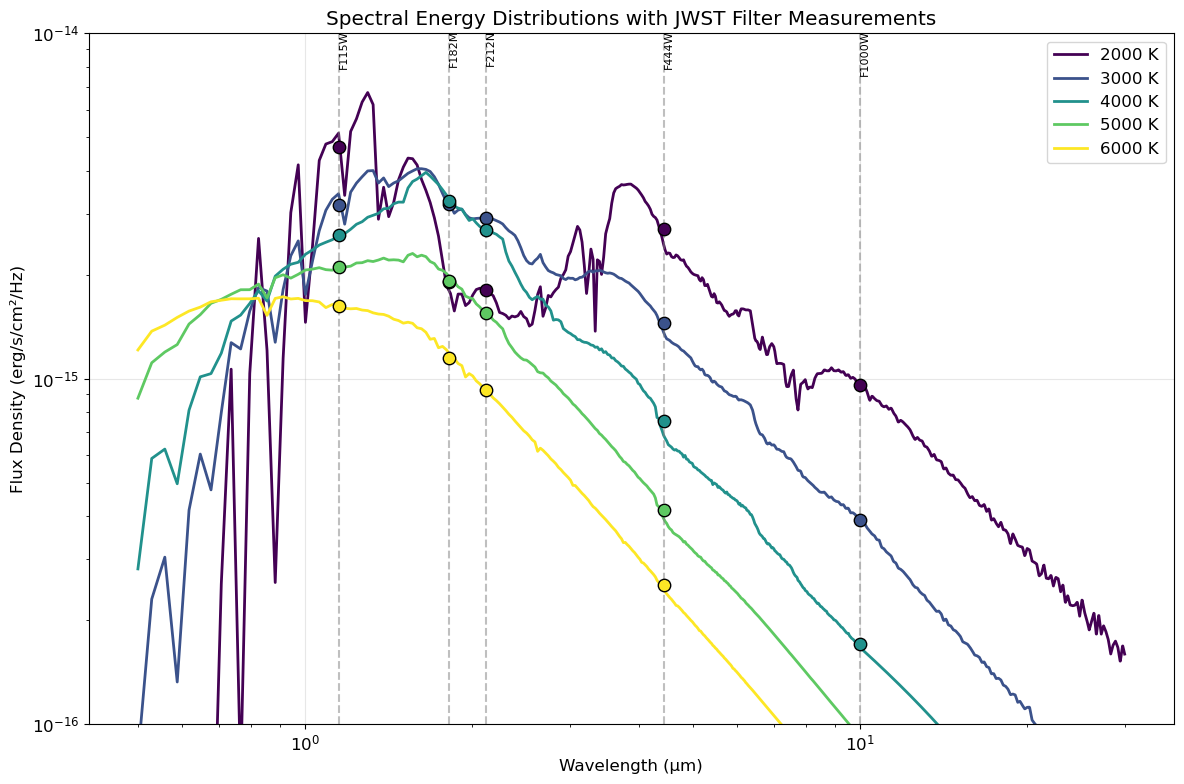

In [52]:
import astropy.units as u
from icemodels import atmo_model, fluxes_in_filters
from astroquery.svo_fps import SvoFps

# Define temperatures and wavelength range
temperatures = [2000, 3000, 4000, 5000, 6000]
wavelengths = np.linspace(0.5, 30, 1000) * u.micron

# Define JWST filters and their approximate central wavelengths
jwst_filters = ['F115W', 'F182M', 'F212N', 'F444W', 'F1000W']
filter_wavelengths = {
    'F115W': 1.15,
    'F182M': 1.82,
    'F212N': 2.12,
    'F444W': 4.44,
    'F1000W': 10.0
}

# Colors for different temperatures
colors = plt.cm.viridis(np.linspace(0, 1, len(temperatures)))

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Generate SEDs for each temperature
for temp, color in zip(temperatures, colors):
    # Get atmospheric model for this temperature
    sed = atmo_model(temp, xarr=wavelengths)

    # Plot the SED
    ax.plot(wavelengths, sed['fnu'].quantity,
            color=color, linewidth=2,
            label=f'{temp} K')

    # Calculate filter fluxes and overlay as points
    try:
        # Get filter data for the JWST filters
        filter_ids = [f'JWST/NIRCam.{filt}' if filt != 'F1000W' else f'JWST/MIRI.{filt}'
                     for filt in jwst_filters]

        # Get transmission data for each filter individually (SvoFps API quirk)
        transdata = {}
        for filt_id in filter_ids:
            transdata[filt_id] = SvoFps.get_transmission_data(filt_id)

        # Calculate fluxes in the filters with proper transdata structure
        fluxes = fluxes_in_filters(wavelengths, sed['fnu'].quantity,
                                  filterids=filter_ids, transdata=transdata)

        # Plot flux measurements as points
        for filt, filt_id in zip(jwst_filters, filter_ids):
            if filt_id in fluxes:
                flux_val = fluxes[filt_id]
                wl = filter_wavelengths[filt] * u.micron
                ax.scatter(wl, flux_val, color=color, s=80, marker='o',
                          edgecolors='black', linewidth=1, zorder=5)

    except Exception as e:
        print(f"Could not calculate filter fluxes for {temp}K: {e}")
        raise

        # Fallback: interpolate flux at filter wavelengths from the SED
        for filt in jwst_filters:
            wl = filter_wavelengths[filt] * u.micron
            # Find closest wavelength in the SED
            idx = np.argmin(np.abs(wavelengths - wl))
            flux_approx = sed['fnu'].quantity[idx]
            ax.scatter(wl, flux_approx, color=color, s=80, marker='s',
                      edgecolors='black', linewidth=1, zorder=5, alpha=0.7)

# Customize the plot
ax.set_xlabel('Wavelength (μm)')
ax.set_ylabel('Flux Density (erg/s/cm²/Hz)')
ax.set_title('Spectral Energy Distributions with JWST Filter Measurements')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xscale('log')
ax.set_yscale('log')

# Add JWST filter bands as vertical lines for reference
for filt, wl in filter_wavelengths.items():
    ax.axvline(wl, color='gray', linestyle='--', alpha=0.5)
    ax.text(wl, ax.get_ylim()[1]*0.9, filt, rotation=90,
            verticalalignment='top', fontsize=8)

# Add legend explanation (not needed because the fallback is invalid)
# ax.text(0.02, 0.98, 'Circles: Filter flux measurements\nSquares: Interpolated (if filter calc fails)',
#         transform=ax.transAxes, verticalalignment='top', fontsize=10,
#         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.ylim(1e-16, 1e-14);
plt.tight_layout()
plt.show()


## Summary

This notebook demonstrates:

1. **Loading and exploring** the stellar colors table
2. **Color vs temperature relationships** for different JWST filters
3. **Color-color diagrams** showing stellar populations
4. **Interactive exploration** of specific temperature ranges

The stellar colors table provides a comprehensive reference for stellar photometry in JWST filters, spanning the full range of stellar temperatures from cool M dwarfs to hot O stars.